<a href="https://colab.research.google.com/github/Enamul-Hoq/Coucoursera/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-02-24 17:51:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-02-24 17:51:54 (26.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [8]:
!head moore.csv
data=pd.read_csv('moore.csv', header=None).to_numpy()

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [9]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [10]:
x= data[:,0].reshape(-1,1)
y= data[:,1]

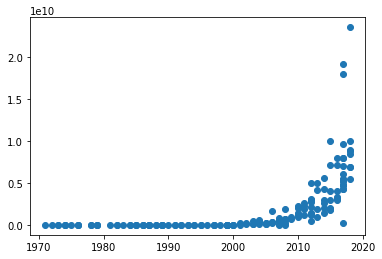

In [11]:
plt.scatter(x,y)

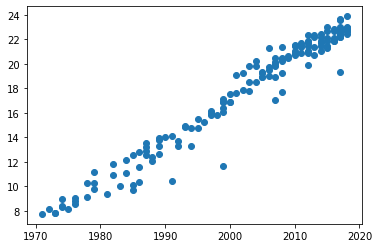

In [12]:
y=np.log(y)
plt.scatter(x,y)

In [13]:
x = x-x.mean()

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1),
])

In [15]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001,0.9),
    loss='mse'
)

In [16]:
def schedule(epoch,lr):
  if epoch >=50:
      return 0.0001
  return 0.001
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [17]:
r = model.fit(x,y,epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 4ms/step - loss: 311.3181 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 282.0086 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 243.3261 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 259.3905 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 164.0902 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 130.6617 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 84.9753 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 62.2032 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 44.7953 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 33.4844 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 3

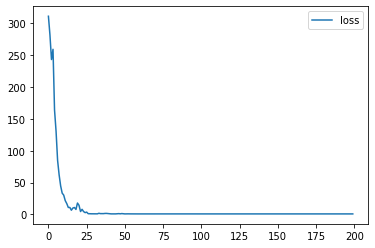

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.legend()

In [19]:
model.layers

In [20]:
model.layers[0].get_weights()

[array([[0.3475026]], dtype=float32), array([17.762022], dtype=float32)]

In [21]:
a=model.layers[0].get_weights()[0][0,0]

In [22]:
a

0.3475026

In [23]:
print("Time to double:", np.log(2)/a)

Time to double: 1.994653283315867


In [24]:
x = x.flatten()
deminator  = x.dot(x)-x.mean()*x.sum()
a= (x.dot(y)-y.mean()*x.sum())/deminator
b= (y.mean()*x.dot(x)-x.mean()*x.dot(y))/deminator

print(a,b)

0.341682487387313 17.764939393631764


In [25]:
print("Time to double:", np.log(2)/a)

Time to double: 2.0286295205239204
